In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar Librerias PyPI - PAQUETES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar Datos

datos = pd.read_excel('/content/drive/MyDrive/Curso Estadistica con Python/data.xlsx')

datos

,Diastólica
0,41.633445
1,43.116347
2,43.989149
3,47.584862
4,47.587327
...,...
9995,112.430930
9996,113.773829
9997,115.290552
9998,118.527315


El dataset trata sobre la presion arterial diastolica.

Se refiere a la presion de la sangre cuando el corazon se relaja entre los latidos. Es la cifra inferior (y mas baja) en una medicion de presion arterial

# Histograma

In [ ]:
#Formula de Sturges

#k = 1 + log2(n)
#log2(10) = 3.32

import math

def Sturges_formula(n):
  k = 1+ 3.32 * math.log10(n)
  return round(k)

n = len(datos['Diastólica'])  #reemplaza con la cantidad de filas del set de datos por columna
num_bins = Sturges_formula(n)
print('Numero de Bins segun la formula de Sturges es: ',num_bins )

Numero de Bins segun la formula de Sturges es:  14


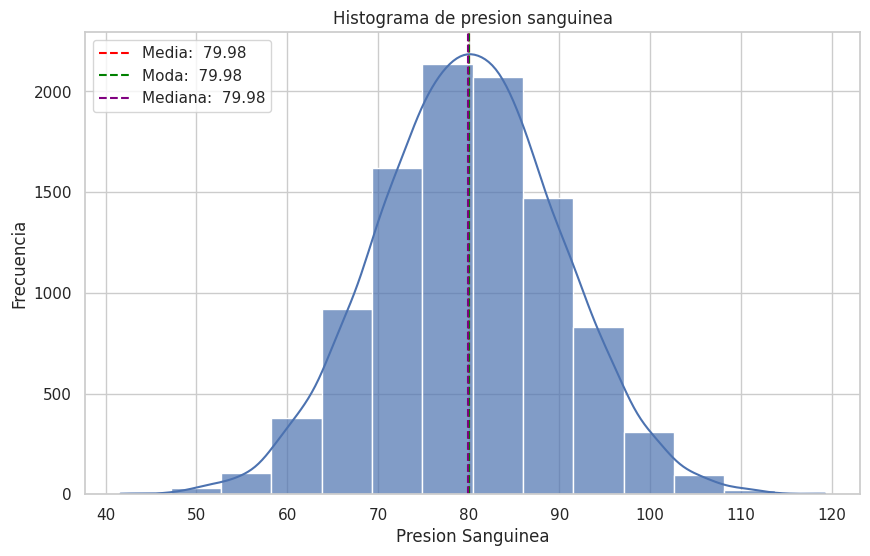

In [ ]:
#Calcular la Media, moda y mediana
media = datos['Diastólica'].mean()
moda = datos['Diastólica'].mode().values[0]
mediana = datos['Diastólica'].median()


#Crear el histograma son seaborn

sns.set(style = 'whitegrid')
plt.figure(figsize= (10,6))
ax = sns.histplot(data = datos['Diastólica'], kde= True, bins=num_bins, alpha = 0.7)


#señalar la media, moda y la mediana en el grafico
plt.axvline(media, color = 'red', linestyle = 'dashed', label = f'Media: {media: .2f}')
plt.axvline(moda, color = 'green', linestyle = 'dashed', label = f'Moda: {moda: .2f}')
plt.axvline(mediana, color = 'purple', linestyle = 'dashed', label = f'Mediana: {mediana: .2f}')

#Personalizar el grafico
plt.legend(loc = 'upper left')
plt.title('Histograma de presion sanguinea')
plt.xlabel('Presion Sanguinea')
plt.ylabel('Frecuencia')

plt.show()

## Simetria

In [ ]:
from scipy.stats import skew
simetria = skew(datos)
print(simetria)

[0.00677241]


##  Curtosis

In [ ]:
from scipy.stats import kurtosis
curtosis =  kurtosis(datos, fisher = True)
print(curtosis)

[0.01235855]


## Conclusion

El grafico de este conjunto de datos muestra una distribucion simetrica, mesocurtica

* La Simetria se evidencia por la forma en que la distribucion es practicamente igual en ambos lados del valor central.

* La Mesocurtosis indica que la distribucion no es ni muy puntiaguda ni mas plana que una distribucion normal teorica.

* Estas caracteristicas son tipicas de una distribucion normal

<ipython-input-7-ad1bcb0ef0a7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


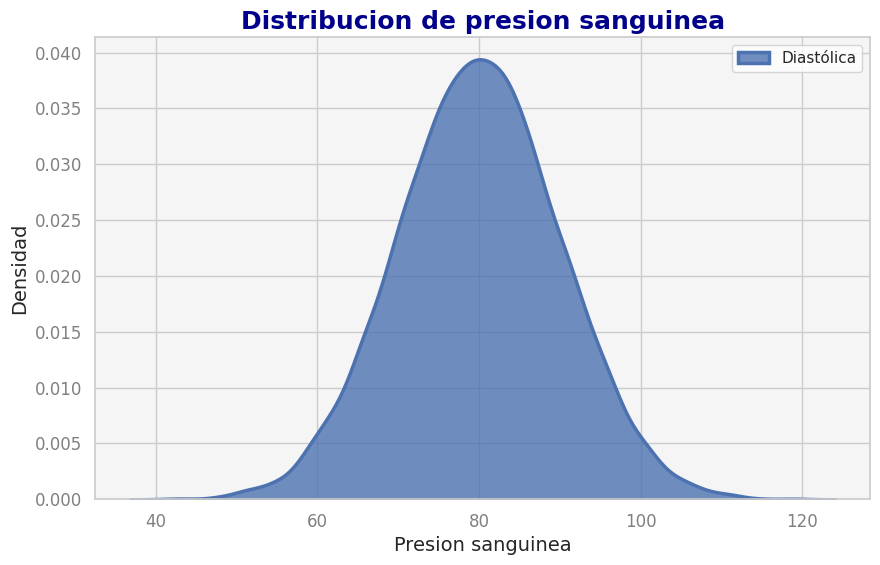

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10,6))
sns.kdeplot(
    datos,
    shade = True,
    color = 'purple',
    label = 'Densidad',
    alpha = 0.8,
    linewidth = 2.5
    )
plt.title('Distribucion de presion sanguinea', color = 'darkblue', fontsize = 18, weight = 'bold')
plt.xlabel('Presion sanguinea',fontsize = 14)
plt.ylabel('Densidad',fontsize = 14)
plt.xticks(fontsize = 12, color = 'gray')
plt.yticks(fontsize = 12,color = 'gray')
plt.gca().set_facecolor('#f5f5f5')

plt.show()